## preamble

In [1]:
SetDirectory["~/Documents/Univ/stochastic_gauge_field/num"];

In [222]:
SetOptions[{Plot,LogPlot,LogLinearPlot,LogLogPlot},
           {(*ImageSize->Large,*)
            Frame->True,
            LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[2]}];
SetOptions[{ListPlot,ListLogPlot,ListLogLinearPlot,ListLogLogPlot},
           {(*ImageSize->Large,*)
            Frame->True, 
            LabelStyle->Directive[Black,Larger,FontFamily->"Palatino"],
            PlotStyle->AbsoluteThickness[2],
            Joined->True}];
SetOptions[{ParametricPlot3D},
           {LabelStyle->Directive[Black,FontFamily->"Palatino"]}];
RGBData = {"#5E81B5","#E19C24","#8FB032","#EB6235","#8778B3","#C56E1A","#5D9EC7","#FFBF00","#A5609D","#929600","#E95536","#6685D9","#F89F13","#BC5B80","#47B66D"};
Color = Map[RGBColor,RGBData];

## 3D simulation

In [8]:
WW[x_,kp_] = WhittakerW[-I x,1/2,-2I kp];
Wp[x_,kp_] = D[WW[x,kp],kp] // Simplify;

-Graphics-
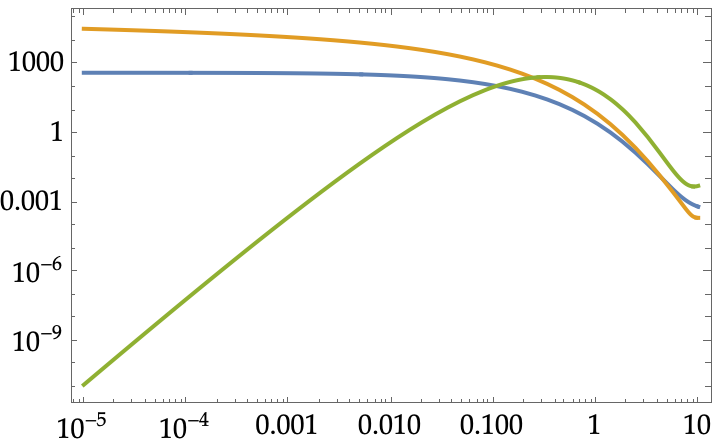

In [10]:
LogLogPlot[{Abs[WW[5,kp]],Abs[Wp[5,kp]],kp^4(Abs[WW[5,kp]]^2+Abs[Wp[5,kp]]^2)},{kp,10^-5,10}]

In [11]:
RR[x_,kp_] = 1/Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2] {{Abs[Wp[x,kp]],-Abs[WW[x,kp]]},{Abs[WW[x,kp]],Abs[Wp[x,kp]]}};
RT[x_,kp_] = Transpose[RR[x,kp]];

0.997818     0.0660282

-0.0660282   0.997818
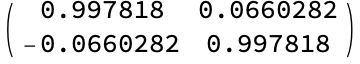

In [14]:
RT[5,0.02] // MatrixForm

In [15]:
RT[5,0.02][[1,2]]

0.0660282

In [16]:
Amp[H_,x_,kp_] = kp^2 H^2 / Sqrt[3] / (2\[Pi]) Exp[\[Pi] x/2] Sqrt[Abs[WW[x,kp]]^2+Abs[Wp[x,kp]]^2];

In [17]:
Hubble = 10^-5;
xi = 5;
kappa = 0.02;

In [139]:
proc = ItoProcess[{\[DifferentialD]Bx[t] + 2 Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]By[t] + 2 By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Bz[t] + 2 Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[1,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t],
                   \[DifferentialD]Ex[t] + 2 Ex[t]\[DifferentialD]t - 2xi Bx[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wx[t],
                   \[DifferentialD]Ey[t] + 2 Ey[t]\[DifferentialD]t - 2xi By[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wy[t],
                   \[DifferentialD]Ez[t] + 2 Ez[t]\[DifferentialD]t - 2xi Bz[t]\[DifferentialD]t == 
                        RT[xi,kappa][[2,2]]Amp[Hubble,xi,kappa]\[DifferentialD]wz[t]}, 
                   {Bx[t],By[t],Bz[t],Ex[t],Ey[t],Ez[t]}, {{Bx,By,Bz,Ex,Ey,Ez},{0,0,0,0,0,0}}, t, 
                   {wx\[Distributed]WienerProcess[], wy\[Distributed]WienerProcess[], 
                       wz\[Distributed]WienerProcess[]}];

In [140]:
Nf = 10;

In [141]:
sol = RandomFunction[proc, {0,Nf,0.01}];

In [142]:
Bsol[t_] = {sol["PathComponent",1]["PathFunction"][t], 
            sol["PathComponent",2]["PathFunction"][t],
            sol["PathComponent",3]["PathFunction"][t]};
Esol[t_] = {sol["PathComponent",4]["PathFunction"][t], 
            sol["PathComponent",5]["PathFunction"][t],
            sol["PathComponent",6]["PathFunction"][t]};

In [144]:
BAmp[t_] = Norm[Bsol[t]]^2;
NormB[t_] = Bsol[t] / Norm[Bsol[t]];
EAmp[t_] = Norm[Esol[t]]^2;
NormE[t_] = Esol[t] / Norm[Esol[t]];

In [191]:
PBB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[WW[x,kp]]^2;
PEE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Abs[Wp[x,kp]]^2;
PBE[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] WW[x,kp] Conjugate[Wp[x,kp]];
PEB[H_,x_,kp_] = kp^4 H^4 / (4\[Pi]^2) Exp[\[Pi] x] Conjugate[WW[x,kp]] Wp[x,kp];
BvarEx[H_,x_,kp_] = 1/4 PBB[H,x,kp];
EvarEx[H_,x_,kp_] = 1/4 PEE[H,x,kp] + x/8 (PBE[H,x,kp]+PEB[H,x,kp]) + x^2/8 PBB[H,x,kp];

Legended[-Graphics-, Placed[LineLegend[{Directive[Opacity[1.], 
 
>       RGBColor[0.368417, 0.506779, 0.709798], AbsoluteThickness[2]], 
 
>      Directive[Opacity[1.], RGBColor[0.880722, 0.611041, 0.142051], 
 
                                                        ~2  ~2
>       AbsoluteThickness[1.6], Dashing[{0, Small}]]}, {B , E }, LegendMarkers -> None, 
 
>     LabelStyle -> Directive[GrayLevel[0], Larger, FontFamily -> Palatino], 
 
>     LegendLayout -> Row, LegendMarkerSize -> 20], {0.4, 0.15}, Identity]]
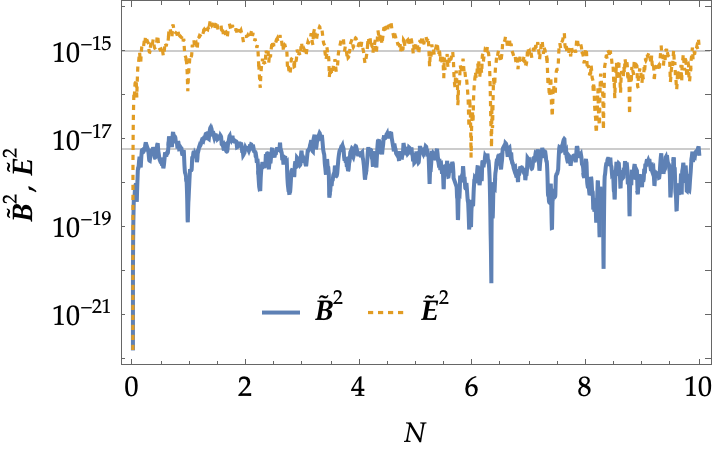

In [236]:
FigBAmpEAmp = 
    LogPlot[{BAmp[t],EAmp[t]},{t,0,Nf}, GridLines->{None,{BvarEx[Hubble,xi,kappa],Abs[EvarEx[Hubble,xi,kappa]]}},
            PlotStyle->{AbsoluteThickness[2],Dotted}, 
            FrameLabel->{N,Row[{OverTilde[Style[B,Bold]]^2, ", ", OverTilde[Style["E",Italic,Bold]]^2}]},
            PlotLegends->Placed[LineLegend[{OverTilde[Style[B,Bold]]^2, OverTilde[Style["E",Italic,Bold]]^2}, 
                                        LegendMarkerSize->20, LegendLayout->"Row"], {0.4,0.15}]]

In [238]:
Export["BAmpEAmp.pdf", FigBAmpEAmp];

Legended[-Graphics3D-, Placed[LineLegend[{Directive[RGBColor[0.368417, 0.506779, 
 
>        0.709798], AbsoluteThickness[2]], 
 
                                                                                  ^  ^
                                                                                  ~  ~
>      Directive[RGBColor[0.880722, 0.611041, 0.142051], AbsoluteThickness[2]]}, {B, E}, 
 
>     LegendMarkers -> None, LabelStyle -> 
 
>      Directive[GrayLevel[0], FontFamily -> Palatino], LegendLayout -> Column], 
 
>    {0.1, 0.1}, Identity]]
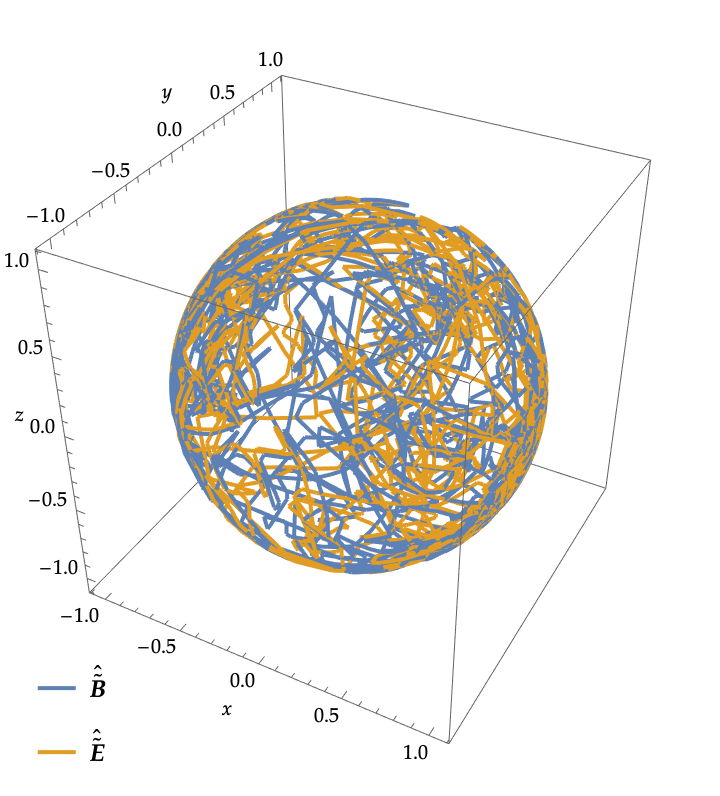

In [245]:
FigNormBNormE = ParametricPlot3D[{NormB[t],NormE[t]},{t,0,Nf}, AxesLabel->{x,y,z}, 
                            PlotLegends->Placed[{OverHat[OverTilde[Style[B,Bold]]], 
                                            OverHat[OverTilde[Style["E",Italic,Bold]]]}, {0.1,0.1}]]

In [240]:
Export["NormBNormE.pdf", FigNormBNormE];

-Graphics-
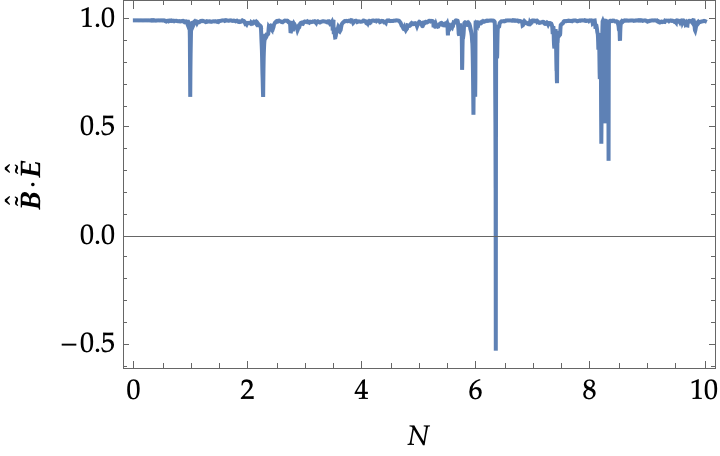

In [241]:
FigCorr = Plot[NormB[t].NormE[t],{t,0,Nf}, PlotRange->Full, 
            FrameLabel->{N,OverHat[OverTilde[Style[B,Bold]]]\[CenterDot]OverHat[OverTilde[Style["E",Italic,Bold]]]}]

In [242]:
Export["Correlation.pdf", FigCorr];